# Emotion Detection Using Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a type of deep learning neural network architecture specifically designed for processing grid-like data, such as images and videos. CNNs have revolutionized the field of computer vision and are widely used for various tasks, including image classification, object detection, facial recognition, and image generation. They are particularly effective at capturing spatial hierarchies of features in data.

# Input Layer:
- The input layer receives the raw image data.
- Images are typically represented as grids of pixels with three color channels (red, green, and blue – RGB).
- The dimensions of the input layer match the dimensions of the input images (e.g., 28x28x1 for a 28×28-pixel image with RGB channels).


## Pooling Layers:

Pooling layers (e.g., MaxPooling or AveragePooling) reduce the spatial dimensions of feature maps while retaining important information.
Pooling helps to make the network more robust to variations in the position or size of objects in the input.

## Flatten Layer:

A flatten layer reshapes the output of the previous layers into a 1D vector, allowing it to be input to a dense layer.

## Fully Connected Layers:

After several convolutional and pooling layers, CNNs typically have one or more fully connected layers (also called dense layers).
Fully connected layers combine high-level features learned from previous layers and make final predictions.
In classification tasks, these layers output class probabilities.

## Loss Function:

CNNs are trained using a loss function (e.g., categorical cross-entropy for classification) that measures the difference between predicted and actual values.
The goal during training is to minimize this loss.

## Backpropagation and Optimization:

CNNs are trained using backpropagation and optimization algorithms (e.g., stochastic gradient descent or its variants) to update network parameters (weights and biases) and minimize the loss function.


## Model Output:

The final output is a probability distribution over the classes.
During training, the model is optimized using a loss function (e.g., categorical cross-entropy) to make its predictions as close as possible to the ground truth labels.

In [2]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers.schedules import ExponentialDecay 
import cv2 
from keras.models import model_from_json 
import numpy as np
import matplotlib.pyplot as plt 


2024-07-25 15:28:28.515747: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 15:28:28.516109: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-25 15:28:28.518609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-25 15:28:28.525646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 15:28:28.537737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

The below code is using the Keras library’s ImageDataGenerator and flow_from_directory functions to create a data generator for training a machine learning model, likely a deep learning model for image classification. Let’s break down the code step by step:

- **train_generator = train_data_gen.flow_from_directory(…)** – This line creates a data generator named train_generator by calling the flow_from_directory method on an instance of ImageDataGenerator called train_data_gen. The train_data_gen object is presumably configured with various data augmentation and preprocessing settings.

- **‘Train File Path’** – This is the path to the directory containing the training images. The **flow_from_directory** function will scan this directory and its subdirectories for image files and generate batches of data from them.


- **target_size=(48, 48)** – This specifies the target size to which the input images will be resized. In this case, the images will be resized to a size of 48×48 pixels. Resizing the images to a consistent size is a common preprocessing step in image-based machine learning tasks.


- **batch_size=64** – This sets the batch size for the data generator. It determines how many images will be included in each batch of training data. In this case, each batch will contain 64 images.

- **color_mode=”grayscale”** – This specifies the color mode for the images. “grayscale” indicates that the images will be converted to grayscale, meaning they will have only one channel (typically representing intensity) instead of the usual three channels (red, green, and blue).

- **class_mode=’categorical’** – This indicates the type of labels associated with the images. In this case, it’s set to “categorical,” which means that the labels are one-hot encoded vectors. In other words, each image belongs to one of several categories, and the labels are represented as binary vectors where only one element is “1” to indicate the category to which the image belongs.

## Create CNN Model Structure
- emotion_model = Sequential() – This line creates a Sequential model using Keras. A Sequential model is a linear stack of layers, where you can add layers one by one in a sequential manner.

- Convolutional Layers:
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation=’relu’, input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation=’relu’))

These lines add two convolutional layers to the model. Convolutional layers are fundamental in CNNs and are used to detect patterns and features in images. The parameters of each Conv2D layer are as follows: 32 and 64 are the number of filters or kernels in the layers. These filters are responsible for learning different features in the input images.

- kernel_size=(3, 3) defines the size of the convolutional kernel or filter.

- activation=’relu’ specifies the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity into the model.

- input_shape=(48, 48, 1) sets the input shape of the first layer to 48×48 pixels with one channel (grayscale images).

- MaxPooling Layer:
    - emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

This line adds a MaxPooling2D layer after the second convolutional layer. Max pooling reduces the spatial dimensions of the feature maps and helps to retain important features while reducing computational complexity.

- Dropout Layers:
    - emotion_model.add(Dropout(0.25))

These lines add dropout layers with a dropout rate of 25%. Dropout is a regularization technique used to prevent overfitting by randomly deactivating a fraction of neurons during training.

- Additional Convolutional and MaxPooling Layers:
    - emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation=’relu’))
    - emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    - emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation=’relu’))
    - emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

These lines add two more pairs of convolutional and max-pooling layers, followed by another dropout layer. These layers likely capture higher-level features from the input images.

- Flattening Layer and Dense Layers:
    - emotion_model.add(Flatten())
    - emotion_model.add(Dense(1024, activation=’relu’))
    - emotion_model.add(Dropout(0.5))
    - emotion_model.add(Dense(7, activation=’softmax’))

- Flatten() flattens the output from the previous layers into a 1D vector.

Dense layers are fully connected layers. The first one has 1024 units with ReLU activation, and the second one has 7 units (likely representing the number of emotion classes) with a softmax activation function, which converts the model’s output into class probabilities.

- Learning Rate Schedule:
    - initial_learning_rate = 0.0001
    - lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, decay_rate=0.96)

This code sets up a learning rate schedule using exponential decay. The learning rate starts at 0.0001 and gradually decreases during training to help the model converge.

- Optimizer:
    - optimizer = Adam(learning_rate=lr_schedule)

The model uses the Adam optimizer with the previously defined learning rate schedule.

- Model Compilation:
    - emotion_model.compile(loss=’categorical_crossentropy’, optimizer=optimizer, metrics=[‘accuracy’])

In [3]:
class Detector:
    def __init__(self,train_data, test_data) -> None:
        self.train_data_gen = ImageDataGenerator(rescale=1./255) 
        self.validation_data_gen = ImageDataGenerator(rescale=1./255) 
        self.train_generator = self.train_data_gen.flow_from_directory( 
	        train_data, 
	        target_size=(48, 48), 
	        batch_size=64, 
	        color_mode="grayscale", 
	        class_mode='categorical') 
        
        self.validation_generator = self.validation_data_gen.flow_from_directory( 
        test_data, 
        target_size=(48, 48), 
        batch_size=64, 
        color_mode="grayscale", 
        class_mode='categorical')
        self.emotion_model = None
        self.emotion_model_info = None
        self.emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful",  
                3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"} 
    
    def model_creation(self):
        self.emotion_model = Sequential() 
        self.emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  
                                input_shape=(48, 48, 1))) 
        self.emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
        self.emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
        self.emotion_model.add(Dropout(0.25)) 

        self.emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
        self.emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
        self.emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
        self.emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
        self.emotion_model.add(Dropout(0.25)) 
        
        self.emotion_model.add(Flatten()) 
        self.emotion_model.add(Dense(1024, activation='relu')) 
        self.emotion_model.add(Dropout(0.5)) 
        self.emotion_model.add(Dense(7, activation='softmax')) 
        
        self.emotion_model.summary() 
        
        cv2.ocl.setUseOpenCL(False) 
        
        initial_learning_rate = 0.0001
        lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,  
                                    decay_rate=0.96) 
        
        optimizer = Adam(learning_rate=lr_schedule) 
        
        self.emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,  
                            metrics=['accuracy'])
    
    def train_model(self):
        self.emotion_model_info = self.emotion_model.fit( 
        self.train_generator, 
        steps_per_epoch=28709 // 64, 
        epochs=30, 
        validation_data=self.validation_generator, 
        validation_steps=7178 // 64)
        self.emotion_model.evaluate(self.validation_generator)
        
    def visualization(self):
        accuracy = self.emotion_model_info.history['accuracy'] 
        val_accuracy = self.emotion_model_info.history['val_accuracy'] 
        loss = self.emotion_model_info.history['loss'] 
        val_loss = self.emotion_model_info.history['val_loss']
        # Accuracy graph 
        plt.subplot(1, 2, 1) 
        plt.plot(accuracy, label='accuracy') 
        plt.plot(val_accuracy, label='val accuracy') 
        plt.title('Accuracy Graph') 
        plt.xlabel('Epochs') 
        plt.ylabel('Accuracy') 
        plt.legend() 
        
        # loss graph 
        plt.subplot(1, 2, 2) 
        plt.plot(loss, label='loss') 
        plt.plot(val_loss, label='val loss') 
        plt.title('Loss Graph') 
        plt.xlabel('Epochs') 
        plt.ylabel('Loss') 
        plt.legend() 
        
        plt.show() 
    
    
    def save_model(self):
        model_json = self.emotion_model.to_json() 
        with open("emotion_model.json", "w") as json_file: 
            json_file.write(model_json) 
    
    def load_model(self):
        json_file = open('emotion_model.json', 'r') 
        loaded_model_json = json_file.read() 
        json_file.close() 
        self.emotion_model = model_from_json(loaded_model_json) 
        
    def validation(self):
        cap = cv2.VideoCapture(0) 
        while True: 
            # Find haar cascade to draw bounding box around face 
            ret, frame = cap.read() 
            frame = cv2.resize(frame, (1280, 720)) 
            if not ret: 
                print(ret) 
            # Create a face detector 
            face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
        
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
        
            # detect faces available on camera 
            num_faces = face_detector.detectMultiScale(gray_frame,  
                                                    scaleFactor=1.3, minNeighbors=5) 
        
            # take each face available on the camera and Preprocess it 
            for (x, y, w, h) in num_faces: 
                cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4) 
                roi_gray_frame = gray_frame[y:y + h, x:x + w] 
                cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame,  
                                                                        (48, 48)), -1), 0) 
                # predict the emotions 
                emotion_prediction = self.emotion_model.predict(cropped_img) 
                maxindex = int(np.argmax(emotion_prediction)) 
                cv2.putText(frame, self.emotion_dict[maxindex], (x+5, y-20),  
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA) 
        
            cv2.imshow('Emotion Detection', frame) 
            if cv2.waitKey(1) & 0xFF == ord('q'): 
                break
        
        cap.release() 
        cv2.destroyAllWindows()
        
        # save trained model weight in .h5 file 
        self.emotion_model.save_weights('emotion_model.h5')
 

## Train The Neural Network Model
The code will train a deep learning model (`emotion_model`) using a data generator (`train_generator`) and validating it using another data generator (`validation_generator`). Let’s break down the code step by step:

- emotion_model_info = emotion_model.fit_generator(…) – This line invokes the fit_generator method on the emotion_model to train the model using data provided by a generator. The training progress and metrics will be stored in the emotion_model_info variable.

- train_generator – This is the data generator used for training the model. It generates batches of training data (input images and their corresponding labels) on the fly from a specified directory of training images.

- steps_per_epoch=28709 // 64 – This parameter specifies how many batches of training data will be processed in each epoch. In this case, it calculates the number of steps needed to process the entire training dataset (with 28,709 samples) in batches of 64 samples each. The double slashes (`//`) indicate integer division, ensuring that the result is an integer.

- epochs=25; This parameter specifies the number of times the entire training dataset will be passed forward and backward through the neural network. In this code, the model will be trained for 25 epochs.

- validation_data=validation_generator – This parameter specifies the data generator used for validation during training. Like the train_generator, the validation_generator generates batches of validation data (usually a separate dataset from the training data) and their labels.

- `validation_steps=7178 // 64` – Similar to steps_per_epoch, this parameter specifies how many batches of validation data will be processed in each validation epoch. It calculates the number of steps needed to process the entire validation dataset (with 7,178 samples) in batches of 64 samples each.

In [4]:
detector = Detector("./archive/train", "./archive/test")
detector.model_creation()

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
detector.train_model()


Epoch 1/30


/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 95s 209ms/step - accuracy: 0.2417 - loss: 1.8325 - val_accuracy: 0.3464 - val_loss: 1.6889
Epoch 2/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.3594 - loss: 1.6489 - val_accuracy: 0.4000 - val_loss: 1.5058
Epoch 3/30


2024-07-25 15:30:05.699782: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-07-25 15:30:05.724342: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.3569 - loss: 1.6514 - val_accuracy: 0.4220 - val_loss: 1.5055
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.4375 - loss: 1.4745 - val_accuracy: 0.2000 - val_loss: 1.7190
Epoch 5/30


2024-07-25 15:31:40.087941: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.4213 - loss: 1.5105 - val_accuracy: 0.4554 - val_loss: 1.4273
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.3750 - loss: 1.5083 - val_accuracy: 0.2000 - val_loss: 1.9600
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 92s 206ms/step - accuracy: 0.4450 - loss: 1.4507 - val_accuracy: 0.4777 - val_loss: 1.3705
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.4688 - loss: 1.5229 - val_accuracy: 0.4000 - val_loss: 1.5435
Epoch 9/30


2024-07-25 15:34:47.071788: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.4780 - loss: 1.3805 - val_accuracy: 0.4948 - val_loss: 1.3240
Epoch 10/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.3281 - loss: 1.4951 - val_accuracy: 0.8000 - val_loss: 0.9387
Epoch 11/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.4996 - loss: 1.3276 - val_accuracy: 0.5170 - val_loss: 1.2815
Epoch 12/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.5625 - loss: 1.1718 - val_accuracy: 0.8000 - val_loss: 0.7091
Epoch 13/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.5067 - loss: 1.2995 - val_accuracy: 0.5225 - val_loss: 1.2675
Epoch 14/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.4531 - loss: 1.4135 - val_accuracy: 0.5000 - val_loss: 1.2430
Epoch 15/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 93s 208ms/step - accuracy: 0.5323 - loss: 1.2500 - val_accuracy: 0.5350 - val_loss: 1.2254
Epoch 16/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.5469 - loss: 1.1043 - val_

2024-07-25 15:41:01.075208: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 101s 225ms/step - accuracy: 0.5436 - loss: 1.2258 - val_accuracy: 0.5360 - val_loss: 1.2174
Epoch 18/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.5156 - loss: 1.2037 - val_accuracy: 0.6000 - val_loss: 1.0204
Epoch 19/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 97s 217ms/step - accuracy: 0.5530 - loss: 1.1813 - val_accuracy: 0.5508 - val_loss: 1.1878
Epoch 20/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.5312 - loss: 1.2347 - val_accuracy: 0.6000 - val_loss: 1.0811
Epoch 21/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 102s 227ms/step - accuracy: 0.5573 - loss: 1.1689 - val_accuracy: 0.5592 - val_loss: 1.1628
Epoch 22/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.6875 - loss: 0.8831 - val_accuracy: 0.6000 - val_loss: 1.2176
Epoch 23/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 100s 224ms/step - accuracy: 0.5760 - loss: 1.1355 - val_accuracy: 0.5671 - val_loss: 1.1577
Epoch 24/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.5312 - loss: 1.2712 - v

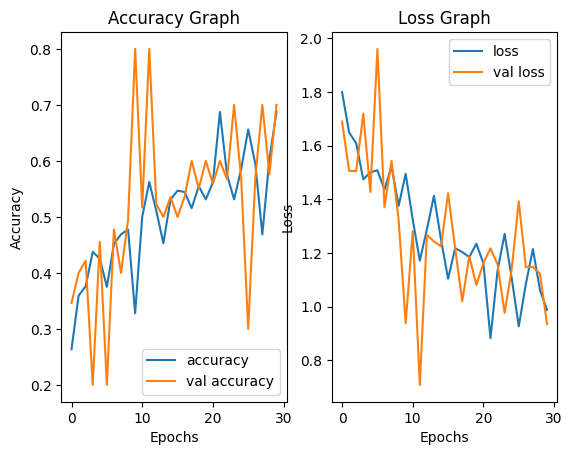

In [6]:
detector.visualization()


In [7]:
# detector.save_model()
detector.load_model()


In [8]:
detector.validation()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/cv2/qt/plugins"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 

: 

file:///home/ali/Pictures/Screenshots/Screenshot%20from%202024-07-25%2015-53-58.png
